<a href="https://colab.research.google.com/github/dhruvilmaniar/PracticalTF/blob/master/CustomModel2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

TensorFlow 2.x selected.


# **Defining A Complete Custom Pipeline**

Here, I have defined Custom pipeline for ML Algorithms using tensorflow 2.0

**Model Building**

In [0]:
class Model():

  def __init__(self):
    self.w = tf.Variable(5.)
    self.b = tf.Variable(0.)

  def __call__(self, x):
    return self.w * x + self.b

test = Model()

assert test(3.0).numpy() == 15.0

**Defining A Loss Function**

Here, we will define the L2 loss function.

In [0]:
def loss_function(predicted_y, actual_y):
  return tf.reduce_mean(tf.square(predicted_y - actual_y))

**Generating Data**

Here I will use Gaussian noise to generate random data.

In [0]:
actual_w = 3.0
actual_b = 2.0
num_examples = 1000

inputs = tf.random.normal(shape=[num_examples])
noise = tf.random.normal(shape=[num_examples])
outputs = inputs * actual_w + actual_b + noise

Let's visualize the training data:

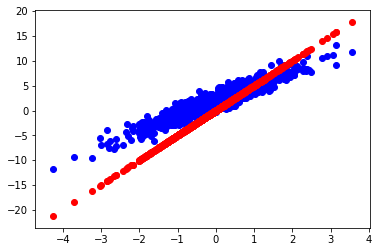

Current loss : 10.048913955688477


In [16]:
model = Model()

plt.scatter(inputs, outputs, c='b')
plt.scatter(inputs, model(inputs), c='r')
plt.show()

print(f'Current loss : {loss_function(model(inputs), outputs).numpy()}')

**Defining Custom Training Loop:**

Here I will use Gradient Descent Algorithm as an optimizer.

Although Gradient Descent is available in the Standart tf.keras package, I will be calculating all by **Custom defined method** as show below, to **get better intuituion of the math behind** the Algorithm.

In [0]:
def train(model, inputs, outputs, learning_rate = 0.1):

  with tf.GradientTape() as tape:
    current_loss = loss_function(model(inputs), outputs)
  dw, db = tape.gradient(current_loss, [model.w, model.b])
  model.w.assign_sub(learning_rate*dw)
  model.b.assign_sub(learning_rate*db)

**Let's Train The Model!!**

This is known as Just Right Fit.

Epoch : 0 Weights : 5.00 bias :  0.00 loss : 10.04891
Epoch : 1 Weights : 4.40 bias :  0.56 loss : 5.62951
Epoch : 2 Weights : 3.98 bias :  0.97 loss : 3.37635
Epoch : 3 Weights : 3.68 bias :  1.26 loss : 2.22688
Epoch : 4 Weights : 3.48 bias :  1.47 loss : 1.64007
Epoch : 5 Weights : 3.33 bias :  1.63 loss : 1.34027
Epoch : 6 Weights : 3.22 bias :  1.74 loss : 1.18698
Epoch : 7 Weights : 3.15 bias :  1.82 loss : 1.10853
Epoch : 8 Weights : 3.10 bias :  1.88 loss : 1.06834
Epoch : 9 Weights : 3.06 bias :  1.92 loss : 1.04774


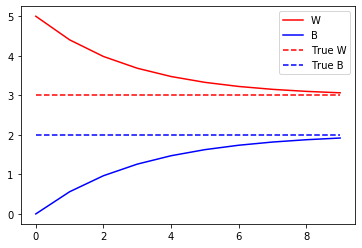

In [30]:
model = Model()

epochs = range(10)
ws, bs = [], []
for epoch in epochs:

  ws.append(model.w.numpy())
  bs.append(model.b.numpy())

  current_loss = loss_function(model(inputs), outputs)
  train(model, inputs, outputs, learning_rate=0.13)

  print(f'Epoch : {epoch} Weights : {ws[-1]:1.2f} bias : {bs[-1]: 1.2f} loss : {current_loss:2.5f}')

plt.plot(epochs, ws, 'r', epochs, bs, 'b')
plt.plot([actual_w]*len(epochs), 'r--', [actual_b]*len(epochs), 'b--')
plt.legend(['W', 'B', 'True W', 'True B'])
plt.show()

**This is known as Underfitting.**

This can be overcome by the following methods:

* Increasing the Learning rate.

Epoch : 0 Weights : 5.00 bias :  0.00 loss : 10.04891
Epoch : 1 Weights : 4.95 bias :  0.04 loss : 9.65658
Epoch : 2 Weights : 4.91 bias :  0.09 loss : 9.28133
Epoch : 3 Weights : 4.87 bias :  0.13 loss : 8.92241
Epoch : 4 Weights : 4.82 bias :  0.17 loss : 8.57911
Epoch : 5 Weights : 4.78 bias :  0.21 loss : 8.25075
Epoch : 6 Weights : 4.74 bias :  0.25 loss : 7.93668
Epoch : 7 Weights : 4.70 bias :  0.28 loss : 7.63627
Epoch : 8 Weights : 4.66 bias :  0.32 loss : 7.34894
Epoch : 9 Weights : 4.62 bias :  0.36 loss : 7.07412


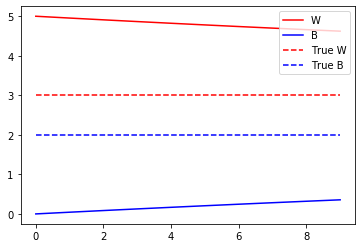

In [31]:
model = Model()

epochs = range(10)
ws, bs = [], []
for epoch in epochs:

  ws.append(model.w.numpy())
  bs.append(model.b.numpy())

  current_loss = loss_function(model(inputs), outputs)
  train(model, inputs, outputs, learning_rate=0.01)

  print(f'Epoch : {epoch} Weights : {ws[-1]:1.2f} bias : {bs[-1]: 1.2f} loss : {current_loss:2.5f}')

plt.plot(epochs, ws, 'r', epochs, bs, 'b')
plt.plot([actual_w]*len(epochs), 'r--', [actual_b]*len(epochs), 'b--')
plt.legend(['W', 'B', 'True W', 'True B'])
plt.show()

**This is known as Overfitting.**

As shown, sometimes the model may never reach the global minima and keeps on oscillating. This can be overcome by the following Methods:

* Smaller Learning Rate
* Regularization
* Adding More Data.

Epoch : 0 Weights : 5.00 bias :  0.00 loss : 10.04891
Epoch : 1 Weights : 0.41 bias :  4.31 loss : 14.02671
Epoch : 2 Weights : 6.21 bias : -0.56 loss : 19.96850
Epoch : 3 Weights : -1.05 bias :  5.02 loss : 28.81380
Epoch : 4 Weights : 7.97 bias : -1.44 loss : 41.95544
Epoch : 5 Weights : -3.18 bias :  6.11 loss : 61.45773
Epoch : 6 Weights : 10.55 bias : -2.79 loss : 90.37988
Epoch : 7 Weights : -6.31 bias :  7.78 loss : 133.25482
Epoch : 8 Weights : 14.35 bias : -4.84 loss : 196.79919
Epoch : 9 Weights : -10.93 bias :  10.29 loss : 290.96454


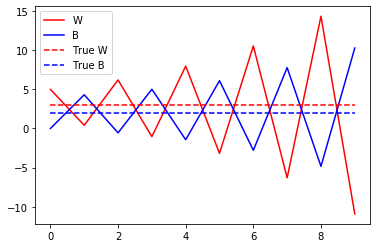

In [32]:
model = Model()

epochs = range(10)
ws, bs = [], []
for epoch in epochs:

  ws.append(model.w.numpy())
  bs.append(model.b.numpy())

  current_loss = loss_function(model(inputs), outputs)
  train(model, inputs, outputs, learning_rate=1)

  print(f'Epoch : {epoch} Weights : {ws[-1]:1.2f} bias : {bs[-1]: 1.2f} loss : {current_loss:2.5f}')

plt.plot(epochs, ws, 'r', epochs, bs, 'b')
plt.plot([actual_w]*len(epochs), 'r--', [actual_b]*len(epochs), 'b--')
plt.legend(['W', 'B', 'True W', 'True B'])
plt.show()